In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../utils/")
from train_tools import pre_process, train_qg_pfn
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
base_dir = "/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/"
fname_gg = base_dir+'H2gg-CF3.0CA3.0-sqg1000-esq1000/total.root'
fname_qq = base_dir+'H2qq-CF3.0CA3.0-sqg1000-esq1000/total.root'

In [4]:
#loading in data and labels 
X, Y = pre_process(fname_qq,fname_gg)

Loaded files at 0.5748310089111328
Read in arrays at 27.942347049713135
Limited max events at 27.942445516586304
Cleaned events at 29.538615942001343
Made quark/gluon input arrays at 98.22356653213501
Finished preprocessing at 227.90065097808838


In [6]:
#Making the 'optimal classifier' in the case that CF = CA, P_g = 1/z, P_q = (1/z)*exp(z+z^2)
#Optimal classifier should be n^(1) + n^(2)
optimal = np.array([np.sum([1/p[0] if p[0] > 0 else 0 for p in jet]) for jet in X])
optimal_roc = roc_curve(Y[:,1],-optimal)
optimal_auc = roc_auc_score(Y[:,1],-optimal)
print(optimal_auc)

0.4993219353585618


In [7]:
pfn_out = train_qg_pfn(fname_qq,fname_gg,n_epoch=3,nev_max=100000)

Loaded files at 0.569373369216919
Read in arrays at 26.895260095596313
Limited max events at 26.895369052886963
Cleaned events at 27.06485939025879
qmaxmult = 19, gmaxmult = 19
Made quark/gluon input arrays at 34.359095335006714
Finished preprocessing at 49.75300645828247
Done train/val/test split at 49.79848527908325
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, None, 3)      0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    400         input[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, 100)    0           tdist_

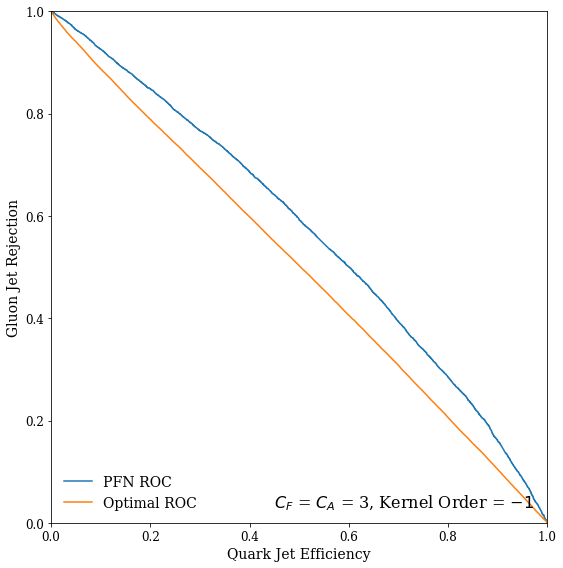

In [8]:
pfn_roc = pfn_out[1][0]

plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.autolayout'] = True

pfn_fp, pfn_tp, threshs = pfn_roc
opt_fp, opt_tp, opt_thresh = optimal_roc
plt.plot(pfn_tp, 1-pfn_fp, '-', label='PFN ROC')
plt.plot(opt_tp,1-opt_fp,"-",label="Optimal ROC")

# axes labels
plt.xlabel('Quark Jet Efficiency',fontsize=14)
plt.ylabel('Gluon Jet Rejection',fontsize=14)

# axes limits
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# make legend and show plot
plt.legend(loc='lower left', frameon=False,fontsize=14)
plt.text(0.45,0.03,r"$C_F$ = $C_A$ = 3, Kernel Order = $-1$",fontsize=16)
plt.show()

In [24]:
Y2 = [y[1] for y in Y]
q_mask = [y==1 for y in Y2]
g_mask = [y==0 for y in Y2]

In [27]:
X_q = X[q_mask]
X_g = X[g_mask]
obs_q = np.array([np.sum([1/p[0] if p[0] > 0 else 0 for p in jet]) for jet in X_q])
obs_g = np.array([np.sum([1/p[0] if p[0] > 0 else 0 for p in jet]) for jet in X_g])

(array([6.33845409e-03, 2.20638508e-03, 5.88206321e-04, 1.81062102e-04,
        6.54022579e-05, 2.73143244e-05, 1.59630419e-05, 9.15612354e-06,
        6.46031430e-06, 4.06296965e-06, 2.93650650e-06, 2.50325144e-06,
        1.59822977e-06, 1.09757948e-06, 5.48789739e-07, 8.76138004e-07,
        9.33905345e-07, 7.70231213e-07, 6.35440751e-07, 4.23627167e-07,
        1.34790462e-07, 1.73302023e-07, 2.02185693e-07, 9.62789016e-08,
        9.62789016e-08, 8.66510114e-08, 3.85115606e-08, 3.85115606e-08,
        2.88836705e-08, 4.81394508e-08, 3.85115606e-08, 6.73952311e-08,
        9.62789016e-09, 1.92557803e-08, 0.00000000e+00, 2.88836705e-08,
        2.88836705e-08, 1.92557803e-08, 1.92557803e-08, 0.00000000e+00,
        5.77673410e-08, 0.00000000e+00, 0.00000000e+00, 4.81394508e-08,
        1.92557803e-08, 9.62789016e-09, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.92557803e-08, 0.00000000e+00, 9.62789016e-09, 0.000000

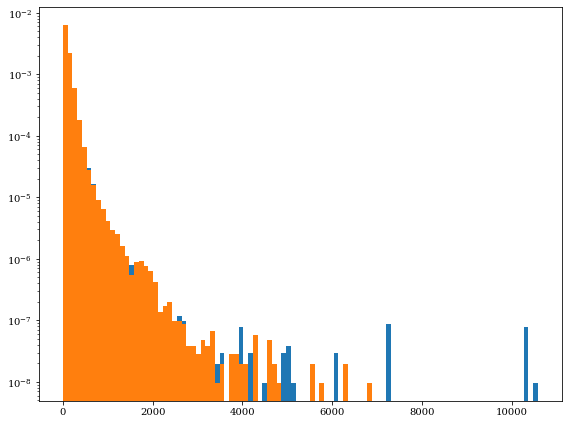

In [37]:
plt.figure(1,(8,6))
nq, binq, patchq = plt.hist(obs_q,bins=100,density=True,log=True)
plt.hist(obs_g,bins=binq,density=True)

(array([4.05811629e-03, 3.08437494e-04, 3.59806225e-05, 9.59393226e-06,
        4.21394679e-06, 2.26904827e-06, 8.23880621e-07, 9.58943018e-07,
        5.49253748e-07, 2.79128954e-07, 1.75581116e-07, 1.08049918e-07,
        3.60166392e-08, 3.60166392e-08, 4.95228789e-08, 1.35062397e-08,
        2.70124794e-08, 1.80083196e-08, 2.70124794e-08, 0.00000000e+00,
        3.15145593e-08, 4.50207990e-09, 0.00000000e+00, 0.00000000e+00,
        9.00415980e-09, 4.50207990e-09, 0.00000000e+00, 9.00415980e-09,
        0.00000000e+00, 4.50207990e-09]),
 array([1.00000000e+00, 2.27153458e+02, 4.53306916e+02, 6.79460374e+02,
        9.05613831e+02, 1.13176729e+03, 1.35792075e+03, 1.58407420e+03,
        1.81022766e+03, 2.03638112e+03, 2.26253458e+03, 2.48868804e+03,
        2.71484149e+03, 2.94099495e+03, 3.16714841e+03, 3.39330187e+03,
        3.61945533e+03, 3.84560878e+03, 4.07176224e+03, 4.29791570e+03,
        4.52406916e+03, 4.75022261e+03, 4.97637607e+03, 5.20252953e+03,
        5.42868299e+03

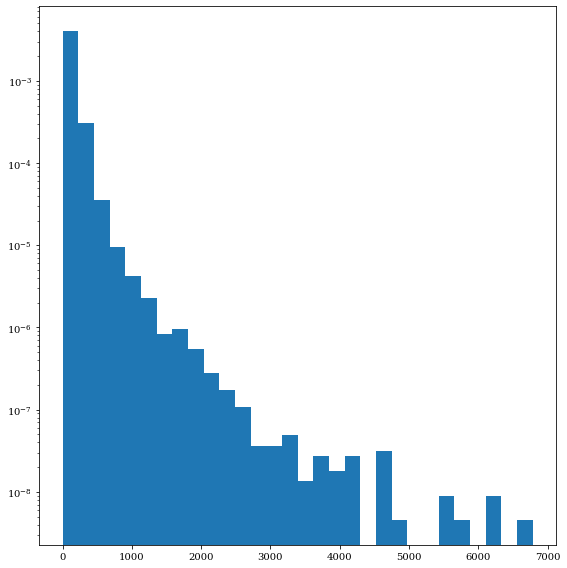

In [35]:
plt.hist(obs_g,bins=30,density=True,log=True)